# DM4: Résaux de neurones : modèles de taux de décharge

Dans le TD, nous avons étudié la dynamique de réseaux de neurones où une *population de neurones* est représentée par son taux de décharge moyen. Les connexions récurrentes entre neurones dans de cette population sont prises en compte via un couplage effectif de la population à elle-même, avec un "poids" de connexion $w$ :

$$\frac{dr}{dt} = \frac{\Phi(I_{ext}+wr(t)) - r(t)}{\tau}$$ 

Nous avons considéré une population inhibitrice ($w<0$) ainsi qu'une population excitratrice ($w>0$).

Dans un cas plus générale, on peut considérer plusieurs populations qui peuvent être couplées entre elles par des connexions synaptiques, ce qui rend la dynamique de ces modèles potentiellement très riche, ce qui est déjà le cas si on considère deux populations avec des connexions récurrentes (entre une population est elle-même du coup) et entre les deux populations. 

Dans ce devoir, nous allons cependant étudier davantage les modèles avec une seule population. Nous avons vu comment un ou plusieurs points fixes apparaissent en fonction des paramètres (le courant externe et le poids de connexion). Quand le système a atteint un point fixe stable, le taux de décharge $r^*$ de la population est donné par le courant total rentrant $I_{\rm tot} = I_{\rm ext} + wr^*$, via la fonction de transfert $\Phi(I)$ :

$$r^* = \Phi(I_{\rm ext} + w r^*)$$

Cette équation ne peut pas être résolu simplement pour calculer $r^*$ ; mais on peut déjà voir que s'il y a des connexions récurrents ($w\neq0$), le taux de décharge final est différent du taux auquel on s'attendrait uniquement en partant du courant externe, $r^*\neq\Phi(I_{\rm ext})$. Quel est alors la rélation entre le taux de décharge final et la stimulation par un courant externe en présence d'un couplage récurrent ? Dans ce devoir, il s'agit de déterminer la fonction de transfert *effective* qui exprime $r^*$ en fonction de $I_{\rm ext}$ :

$$ r^* = F(I_{\rm ext}) $$.

Pour caractériser $F$, il faut déterminer $r^*$ pour différentes valeurs de $I_{\rm ext}$, ce qui vous permettra après de tracer $F(I_{\rm ext}$. 

## Exercise : Réseau inhibiteur

Déterminez le taux de décharge final $r^*$ pour une population inhibitrice avec un poids $w=-1$mV/Hz (`w = -1`), en utilisant la fonction de transfert du TD `fI` avec les paramètres standard (ne modifiez pas `kappa`, `Ihalf`, `rmax`). Plottez $r^*$ en fonction de $I_{\rm ext}$ pour des valeurs de $I_{\rm ext}\in \{-10,50\}$ (`Iexts = np.arange(-10,51,1)`). Comparez avec la fonction de transfert de la population sans connexions récurrentes, à savoir $r^*=\Phi(I_{\rm ext})$.

**Indice :** Vous pouvez déterminer $r^*$ de deux façons différentes quand $w\neq0$ : 

(1) Intégrez l'évolution du système suffisament longtemps pour que l'état finale soit approximativement atteint (vous pouvez garder $T=5\tau$, ou `T = 5` avec `tau = 1`, comme dans le TD) et prenez simplement la valeur finale. Dans le cas d'un réseau inhibiteur ($w<0$), le résultat final ne dépendra pas de la condition initiale. 

(2) Vous pouvez utilisez la méthode de détermination numérique que je vous ai rajouté dans le notebook du TD (nous l'avons pas vu ensemble dans le cours). 



In [21]:
# uncomment for interactive plots
%matplotlib notebook

# comment above and uncomment below for 
# 'passive' plots (image only)
#%matplotlib inline

# import necessary modules for numerics and plotting
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Definition of the f-I curve 

# set standard parameters 
# --> these will be used as default parameters
# in the function definitions
rmax = 500.0     # (could be Hz)
Ihalf = 10.0   # (could be pA)
kappa = 0.2  # (1/unit of current)

# f-I curve
def fI(I, kappa=kappa, Ihalf=Ihalf, rmax=rmax):
    """fI(I, kwargs**) returns the population firing rate (in Hz) 
    for a given input current I (in mV)."""
    return rmax*0.5*(1.0+np.tanh((I-Ihalf)*kappa))

In [23]:
# définition de la dynamique

tau = 1 # setting tau = 1 is equivalent to 
        # measuring times in units of tau 

def drdt(r, t=None, w=0, Iext=0):
    """Returns the derivative of the population firing rate
    r as a function of r, time, and the parameters w and Iext."""
    return (fI(Iext+w*r)-r)/tau

In [24]:
# Intégration numérique
# --> odeint ou la méthode d'Euler

# we can use the ODE solver routine from scipy
# (you can obtain equivalent results by numerical
# integration with the Euler method)
from scipy.integrate import odeint

# define the times for which we want to compute 
# the solution of r(t) for a given set of parameters
t = np.arange(0,5,0.1)

# compute the solution for different initial values
r0 = 0.0 # condition initiale

# external currents probed
Iexts = np.arange(-10,10,0.1) # mV
nI = len(Iexts)

# inhibitory self-connections
w = -0.1 # mV/Hz

# loop over external currents
rfinal = np.zeros(nI)
for i,Iext in enumerate(Iexts):
    r_of_t = odeint(drdt, r0, t, args=(w,Iext))
    rfinal[i] = r_of_t[-1]

<IPython.core.display.Javascript object>


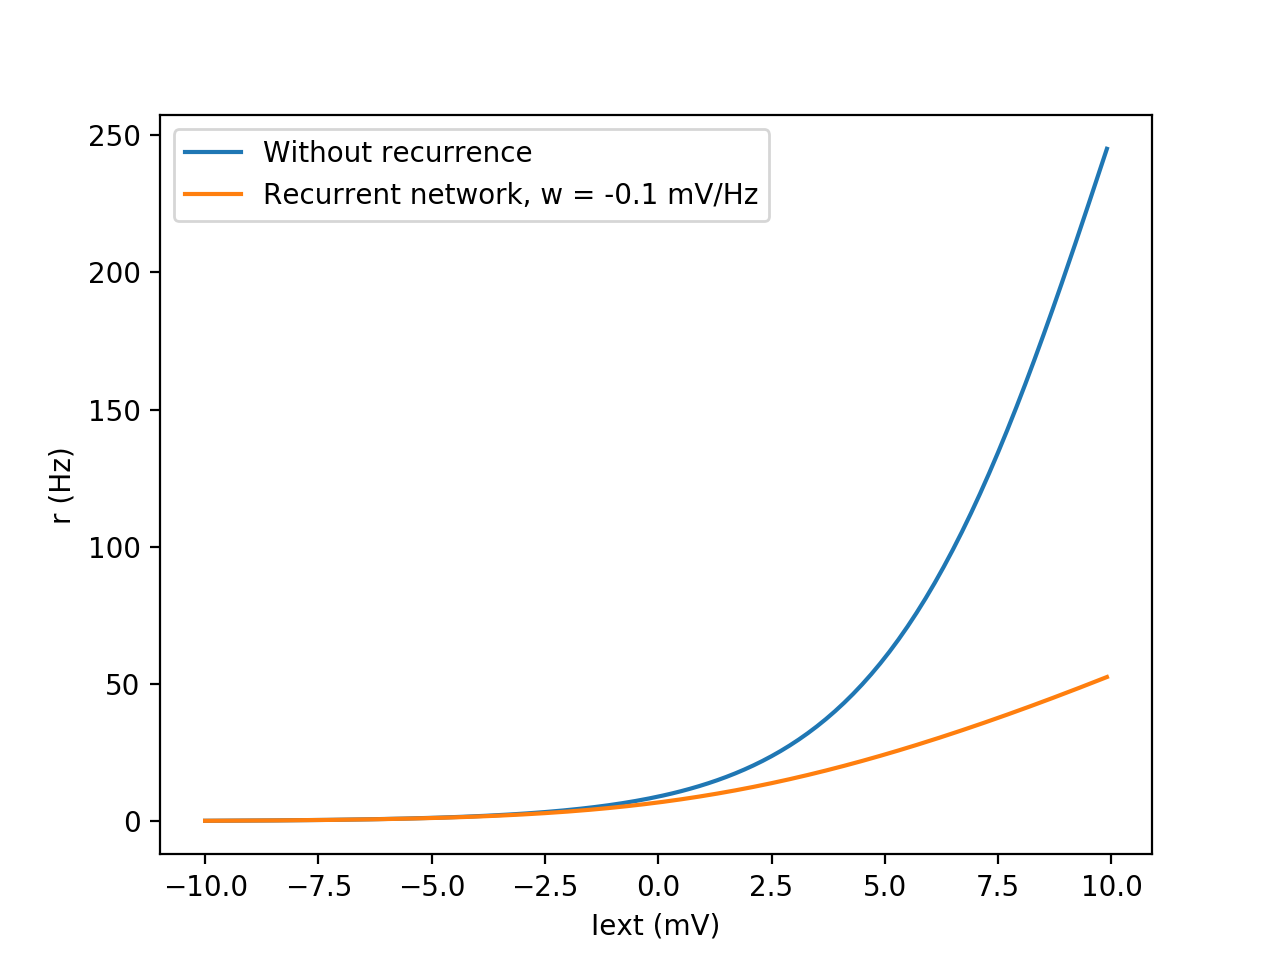

Text(0, 0.5, 'r (Hz)')

In [25]:
fig, ax = plt.subplots()
ax.plot(Iexts, fI(Iexts), label='Without recurrence')
ax.plot(Iexts, rfinal, label='Recurrent network, w = %g mV/Hz'%w)
ax.legend()
ax.set_xlabel('Iext (mV)')
ax.set_ylabel('r (Hz)')

**Observation :** La connexion récurrente inhibitrice fait que le taux de décharge du réseau augmente moins rapidement en fonction du courant externe qu'en absence d'inhibition. 

## BONUS : Réseau excitateur

Répétez l'analyse pour un réseau récurrent avec $w=1$mV/Hz (`w = 1`). 

**Attention :** Comme il y a deux points fixes stables, le résult final pour $r^*$ dépendra de la condition initiale. 

Déterminez alors les deux courbes $F$ effectives :

1. Pour la première qui décrit l'évolution du point fixe à activité faible, utilisez la condition initiale $r(0)=0$ Hz. 

2. Pour la deuxième qui décrit l'évolution du point fixe à activité élevée, utilisez la condition initiale $r(0)=500$ Hz. 

In [16]:
# Intégration numérique
# --> odeint ou la méthode d'Euler

# we can use the ODE solver routine from scipy
# (you can obtain equivalent results by numerical
# integration with the Euler method)
from scipy.integrate import odeint

# define the times for which we want to compute 
# the solution of r(t) for a given set of parameters
t = np.arange(0,5,0.1)

# compute the solution for different initial values
r0lo = 0.0 # condition initiale
r0hi = 500.0 # condition initiale

# external currents probed
Iexts = np.arange(-50,10,0.1) # mV
nI = len(Iexts)

# inhibitory self-connections
w = 1 # mV/Hz

# loop over external currents
rlo = np.zeros(nI)
rhi = np.zeros(nI)
for i,Iext in enumerate(Iexts):
    r_of_t = odeint(drdt, r0lo, t, args=(w,Iext))
    rlo[i] = r_of_t[-1]
    
    r_of_t = odeint(drdt, r0hi, t, args=(w,Iext))
    rhi[i] = r_of_t[-1]
    

<IPython.core.display.Javascript object>


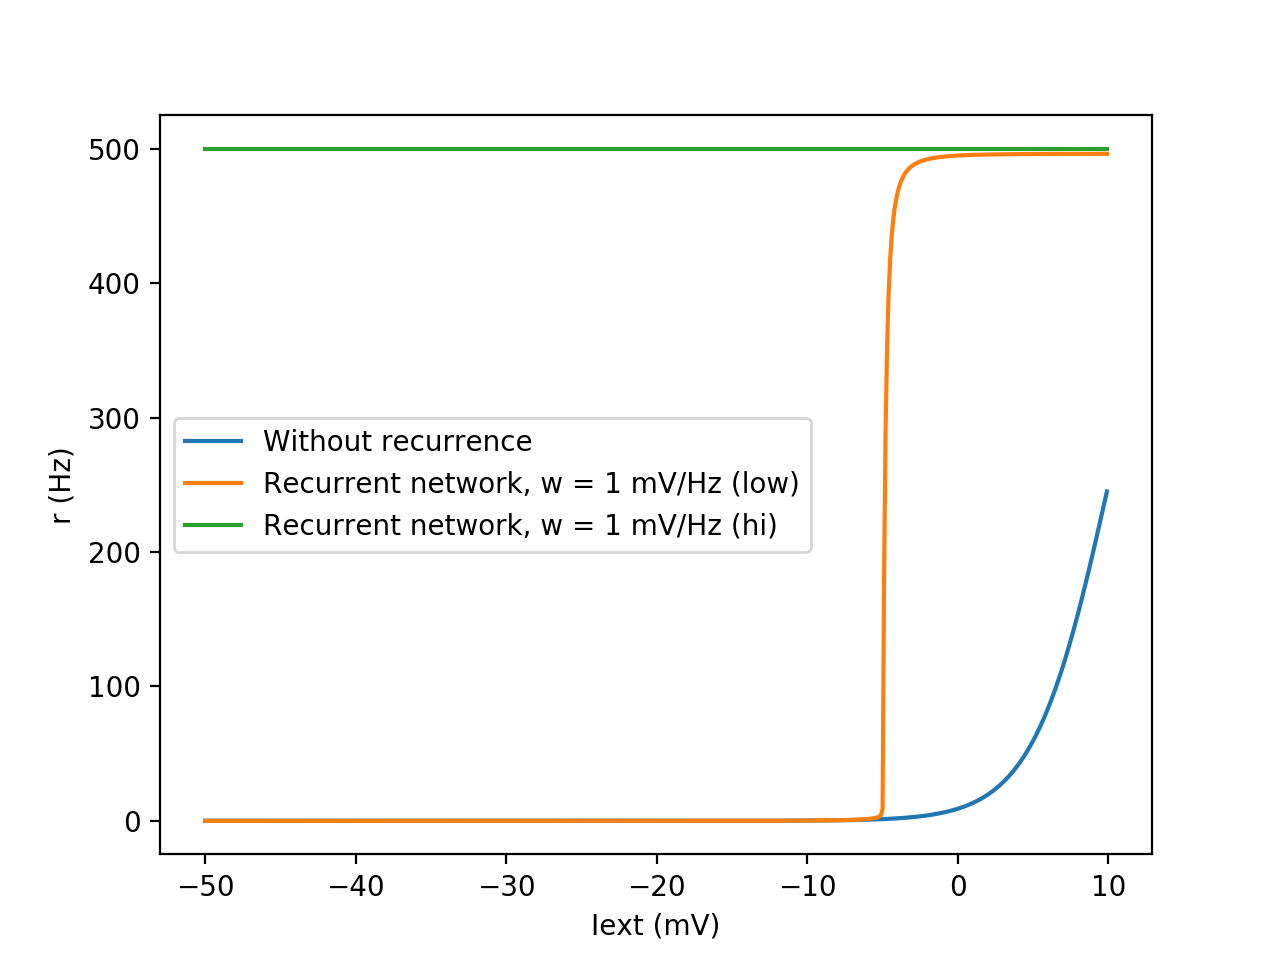

Text(0, 0.5, 'r (Hz)')

In [17]:
fig, ax = plt.subplots()
ax.plot(Iexts, fI(Iexts), label='Without recurrence')
ax.plot(Iexts, rlo, label='Recurrent network, w = %g mV/Hz (low)'%w)
ax.plot(Iexts, rhi, label='Recurrent network, w = %g mV/Hz (hi)'%w)
ax.legend()
ax.set_xlabel('Iext (mV)')
ax.set_ylabel('r (Hz)')

In [18]:
# inhibitory self-connections
w = 0.1 # mV/Hz

# loop over external currents
rlo = np.zeros(nI)
rhi = np.zeros(nI)
for i,Iext in enumerate(Iexts):
    r_of_t = odeint(drdt, r0lo, t, args=(w,Iext))
    rlo[i] = r_of_t[-1]
    
    r_of_t = odeint(drdt, r0hi, t, args=(w,Iext))
    rhi[i] = r_of_t[-1]
    

<IPython.core.display.Javascript object>


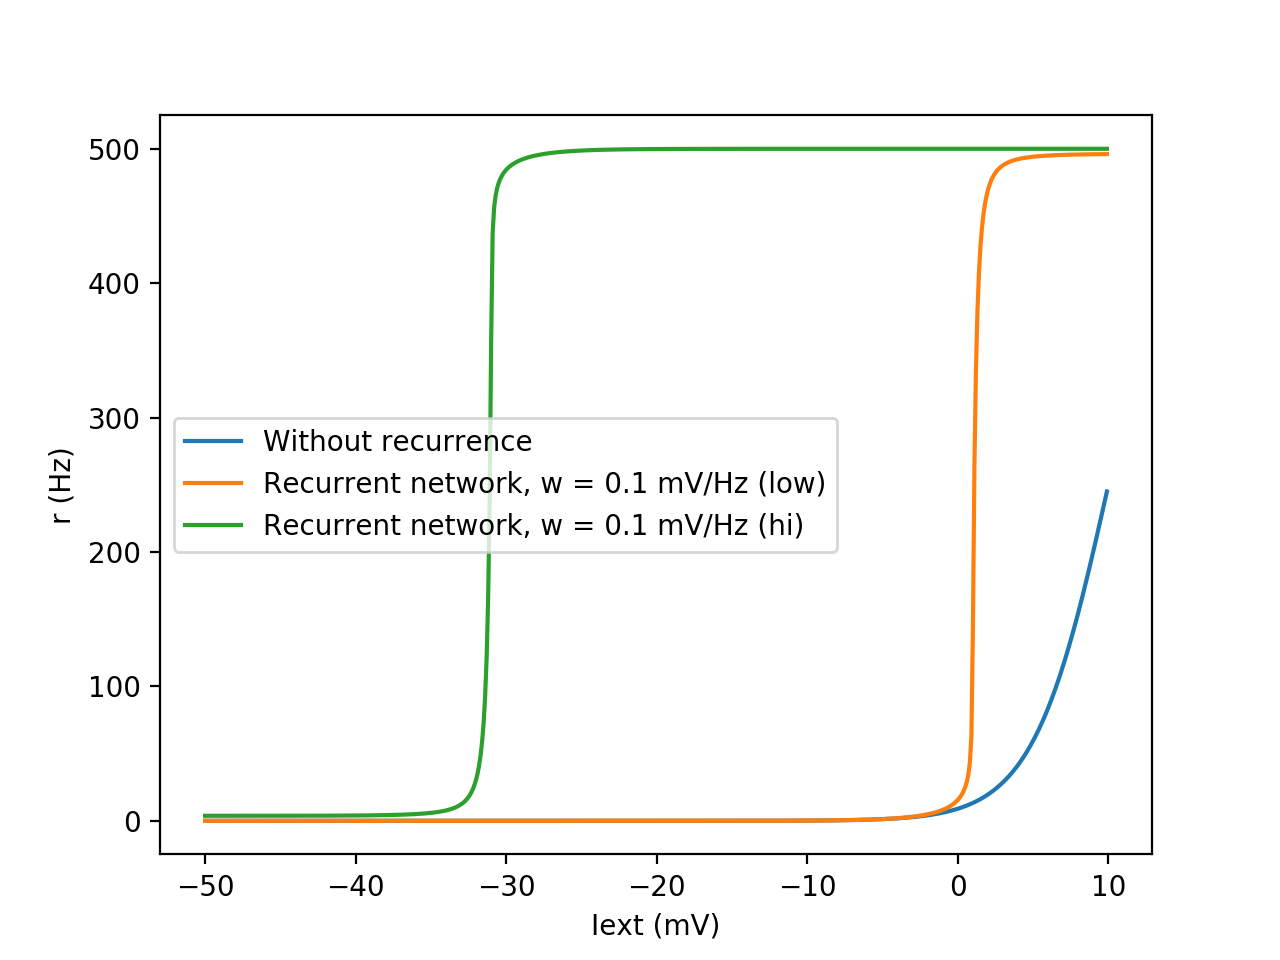

Text(0, 0.5, 'r (Hz)')

In [19]:
fig, ax = plt.subplots()
ax.plot(Iexts, fI(Iexts), label='Without recurrence')
ax.plot(Iexts, rlo, label='Recurrent network, w = %g mV/Hz (low)'%w)
ax.plot(Iexts, rhi, label='Recurrent network, w = %g mV/Hz (hi)'%w)
ax.legend()
ax.set_xlabel('Iext (mV)')
ax.set_ylabel('r (Hz)')

**Observation :** Pour le réseau excitateur, les connexions récurrentes synaptiques (représentées par une seule connexion récurrente au niveau de la population) font qu'à partir d'un courant externe critique, il y a deux points fixes stables. Au-delà d'un certain courant, existe seulement un point fixe à taux de décharge élevé. Le taux de décharge peut donc varier brusquement en fonction du courant externe, ce qui est très différent de la réponse pour un réseau sans connexions excitatrices récurrentes. 

Pour des valeurs de courant intermédiaire, l'état du résau dépend de l'initialisation et/ou histoire de la stimulation : Si le système part d'un état à taux de décharge très élevé, il le reste ; si le résau est initialement silencieux, il restera dans un état à faible taux de décharge.